In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.width', 55)
import seaborn as sns
import matplotlib.pyplot as plt


df_raw = pd.read_csv(os.path.join(os.getcwd(),  "mse.csv"))
df_raw = pd.read_csv(os.path.join(os.getcwd(),  "mse.csv"))
data = pd.read_csv(os.path.join(os.getcwd(),  "mse.csv"), index_col=0)
df_dataset_removed = pd.read_csv(os.path.join(os.getcwd(),  "mse.csv")).drop(columns="fname", axis = 1)

We scaled the data using min max scaling to enable comparison and to prevent scale of each dataset affect the interpretation.

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_dataset_removed = pd.DataFrame(scaler.fit_transform(df_dataset_removed), columns=df_dataset_removed.columns)
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

The csv file consist of the performance of machine learning models against sampled univariate time series data from M4 competition (i.e., from each domain, we sampled 50 datasets). Metric was used as an evaluation metrics (performance metrics). 

Basic summary

In [3]:
df_dataset_removed.describe()

,ridge,rf,lr,gb,xbg,dt,lasso,enr,knn
count,250.000000,250.000000,2.500000e+02,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.064970,0.062568,4.214768e-03,0.062253,0.062086,0.018100,0.064422,0.064204,0.063549
std,0.117430,0.115214,6.332183e-02,0.114642,0.115004,0.083216,0.116032,0.116087,0.116247
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002030,0.002087,4.919555e-08,0.002143,0.001983,0.000128,0.002082,0.002084,0.001929
50%,0.016137,0.015063,3.996929e-07,0.014764,0.014065,0.000662,0.015845,0.015693,0.014362
75%,0.083875,0.085812,1.901348e-06,0.083705,0.085472,0.003350,0.085938,0.085076,0.088356
max,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Side-by-side box plot

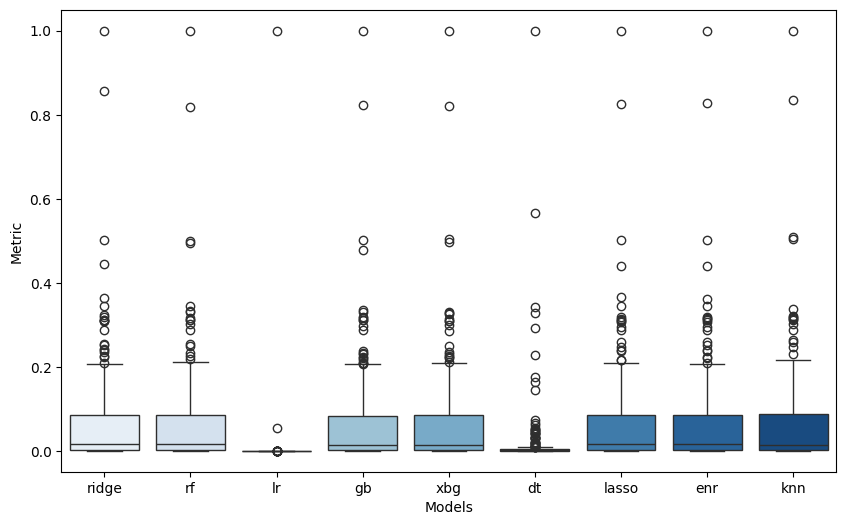

In [4]:
plt.figure(figsize=(10, 6))
plt.xlabel("Models")  # Replace with your x-axis label
plt.ylabel("Metric")  # Replace with your y-axis label
sns.boxplot(data=df_dataset_removed, palette="Blues")
# Show the plot
# plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()

### Model's with lowest to highest error

In [5]:
sum_stat = df_dataset_removed.describe()
mean=sum_stat.loc["mean"]
pd.DataFrame(mean.sort_values())

,mean
lr,0.004215
dt,0.018100
xbg,0.062086
gb,0.062253
rf,0.062568
knn,0.063549
enr,0.064204
lasso,0.064422
ridge,0.064970


Side-by-side box plot where outliers are removed using IQR method. 

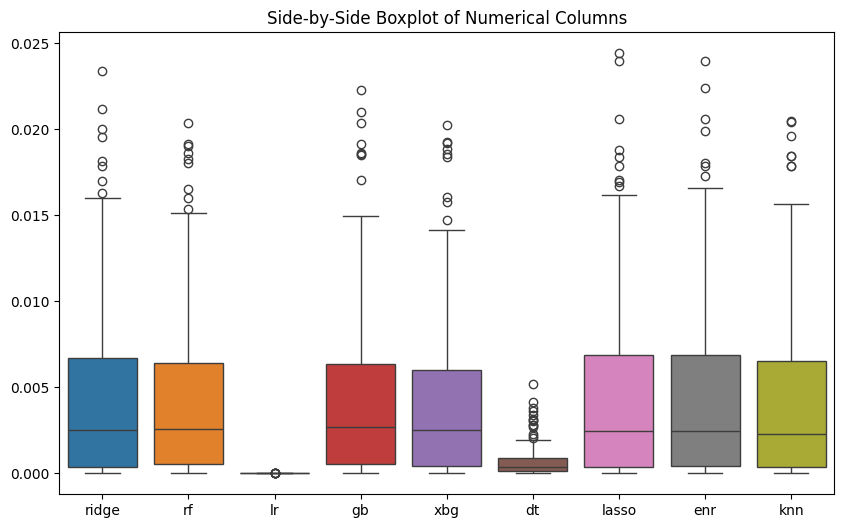

In [6]:
# Function to detect and remove outliers using the IQR method
def remove_outliers_iqr(df):
    df = df.copy(deep=True)
    for col in df.select_dtypes(
        include="number"
    ).columns:  # Loop through each numerical column
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows where the value in this column is an outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df


# Assuming df is your original DataFrame
df_clean = remove_outliers_iqr(df_dataset_removed)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean)

# Show the plot
plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()

### Model's with lowest to highest error - Outlier removed

In [7]:
sum_stat = df_dataset_removed.describe()
mean=sum_stat.loc["mean"]
pd.DataFrame(mean.sort_values())

,mean
lr,0.004215
dt,0.018100
xbg,0.062086
gb,0.062253
rf,0.062568
knn,0.063549
enr,0.064204
lasso,0.064422
ridge,0.064970


average rank of model's performance

In [8]:
# Rank each model's performance (lower MAE = better performance, so rank ascending)
ranked_data = data.rank(axis=1, method='average', ascending=True)
# Calculate the average rank for each model across all datasets
average_ranks = ranked_data.mean(axis=0).sort_values()
# print("Average Ranks for Each Model:\n", average_ranks)
average_ranks

lr       1.070
dt       3.412
xbg      5.046
rf       5.640
gb       5.848
enr      5.896
lasso    5.950
knn      5.994
ridge    6.144
dtype: float64

Bar graph of average rank of model's performance

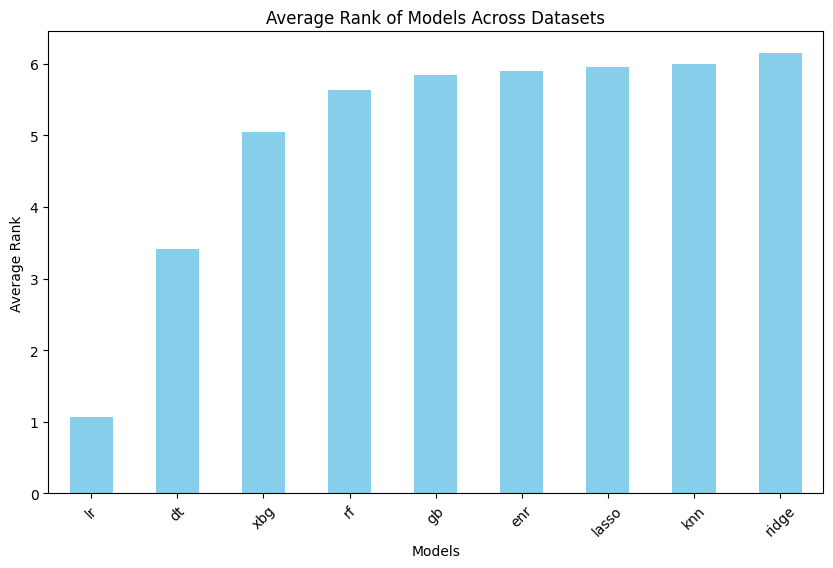

In [9]:
average_ranks.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Rank of Models Across Datasets')
plt.ylabel('Average Rank')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()

Heat map of model ranking per dataset

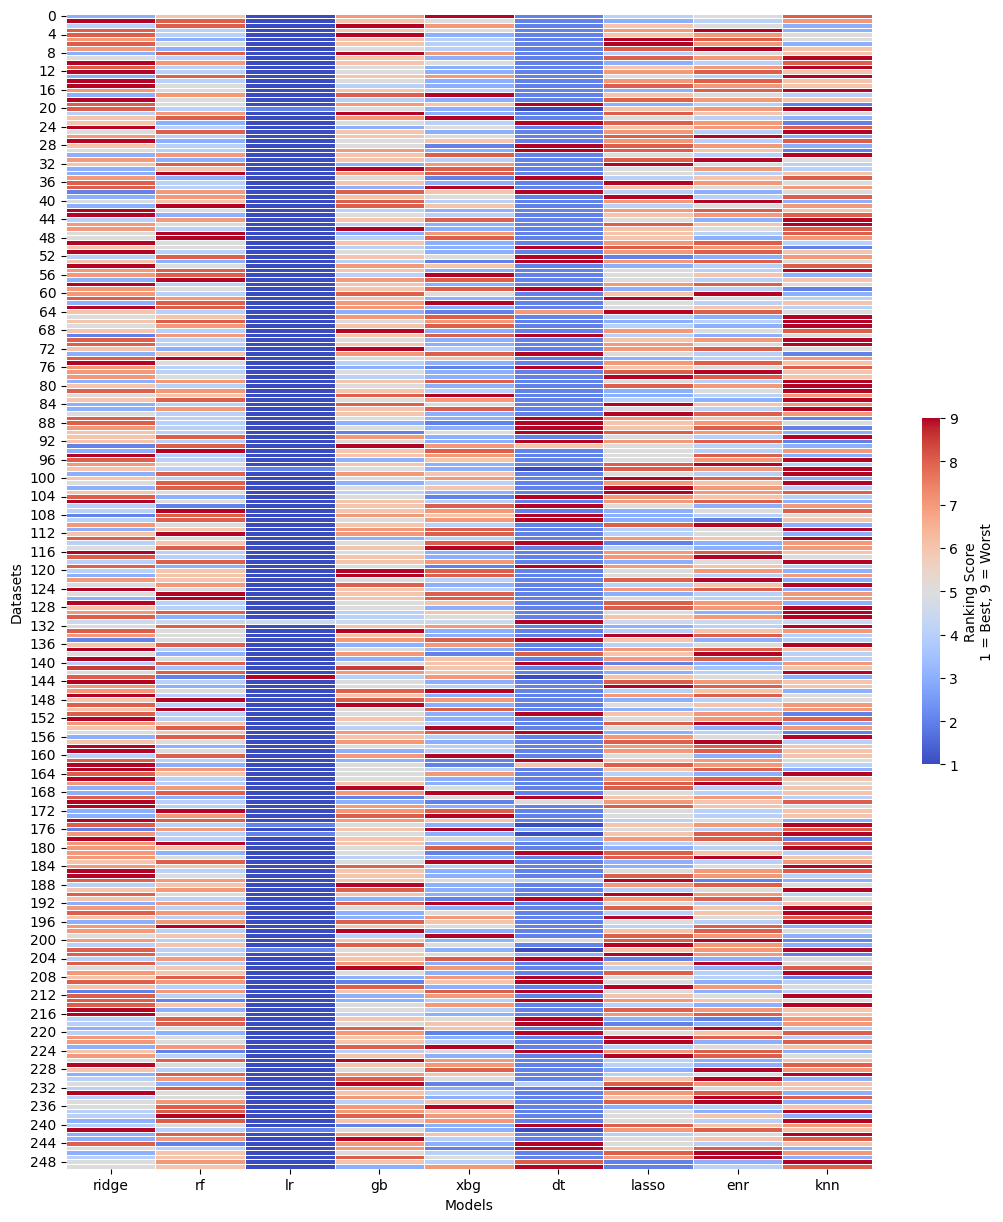

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot heatmap of ranked models with a smaller color bar
plt.figure(figsize=(13, 15))
sns.heatmap(
    ranked_data,
    annot=False,
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Ranking Score\n1 = Best, 9 = Worst', 'shrink': 0.3}  # Adjust shrink value
)

# Add labels for the plot
# plt.title('Model Rankings per Dataset')
plt.xlabel('Models')
plt.ylabel('Datasets')

plt.show()
